In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.tools.plotting import scatter_matrix
from sklearn import datasets, linear_model
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# Set some parameters to get good visuals - style to dark and size to 15,10
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 9)

In [4]:
plt.rcParams['font.size'] = 18
plt.rcParams['axes.labelsize'] = 28
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 14
plt.rcParams['axes.linewidth'] = 1

In [5]:
df = pd.read_csv("./winequality-red.csv")

In [6]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df.shape

(1599, 12)

In [8]:
dfQ = df.groupby('quality').agg('count')

In [9]:
dfQ.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199


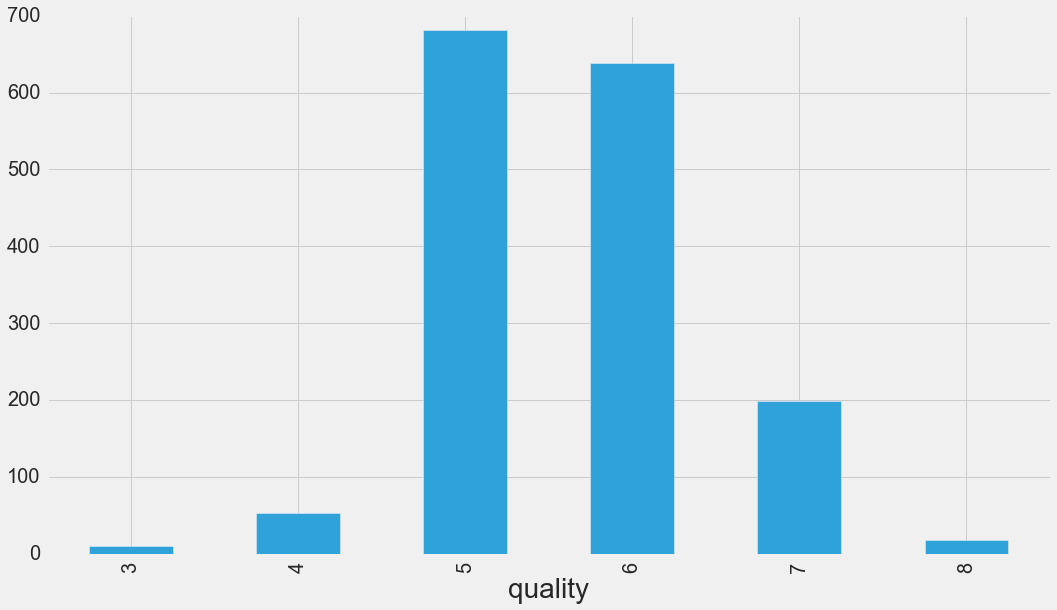

In [10]:
dfQ.pH.plot(kind = "bar")

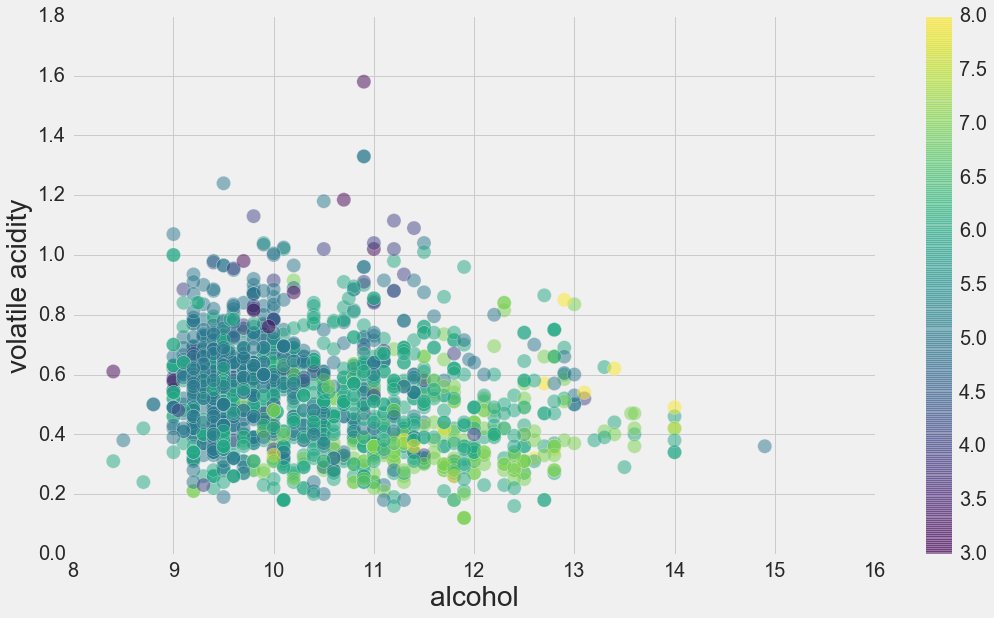

In [11]:
df.plot(kind = "scatter", y = "volatile acidity" , x = "alcohol", c = df.quality, \
        s = 200, alpha = 0.5, cmap=plt.cm.viridis)

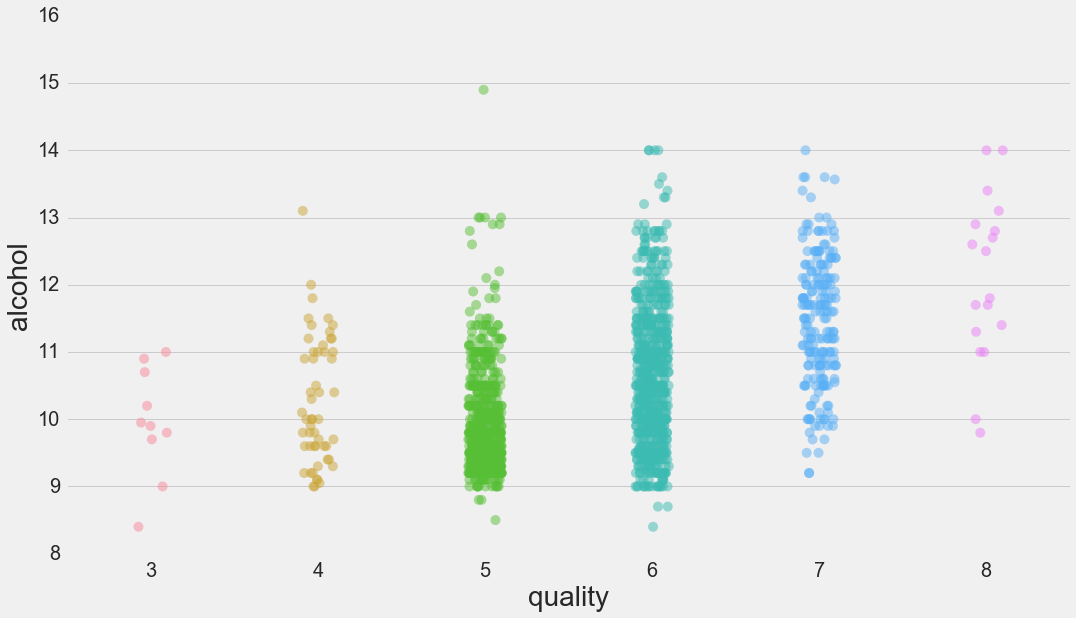

In [12]:
sns.stripplot(data = df, y = "alcohol", x = "quality", s = 10, alpha = 0.5, jitter = True, cmap=plt.cm.viridis)

In [13]:
alcohol = df.iloc[:,10]
vacidity = df.iloc[:,1]
quality=df.iloc[:,11]

In [14]:
alcohol = alcohol.reshape(alcohol.shape[0],1)
vacidity = vacidity.reshape(vacidity.shape[0],1)
quality = quality.reshape(quality.shape[0],1)

In [15]:
df.iloc[:,0:11].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [16]:
# Regression Model on all the data
model = linear_model.LinearRegression()
model.fit(df.iloc[:,0:11], df.iloc[:,11])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
model.coef_

array([  2.49905527e-02,  -1.08359026e+00,  -1.82563948e-01,
         1.63312698e-02,  -1.87422516e+00,   4.36133331e-03,
        -3.26457970e-03,  -1.78811638e+01,  -4.13653144e-01,
         9.16334413e-01,   2.76197699e-01])

In [18]:
model.score(df.iloc[:,0:11], df.iloc[:,11])

0.36055170303868977

In [19]:
model.predict(df.iloc[:,0:11])

array([ 5.03285045,  5.13787975,  5.20989474, ...,  5.94304255,
        5.47075621,  6.00819633])

In [21]:
prediction = model.predict(df.iloc[:,0:11])

In [50]:
df['prediction'] =  model.predict(df.iloc[:,0:11])

In [51]:
df['residual'] = df['prediction'] - df['quality']

In [52]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction,residual
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.032850,0.032850
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,5.137880,0.137880
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,5.209895,0.209895
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5.693858,-0.306142
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.032850,0.032850


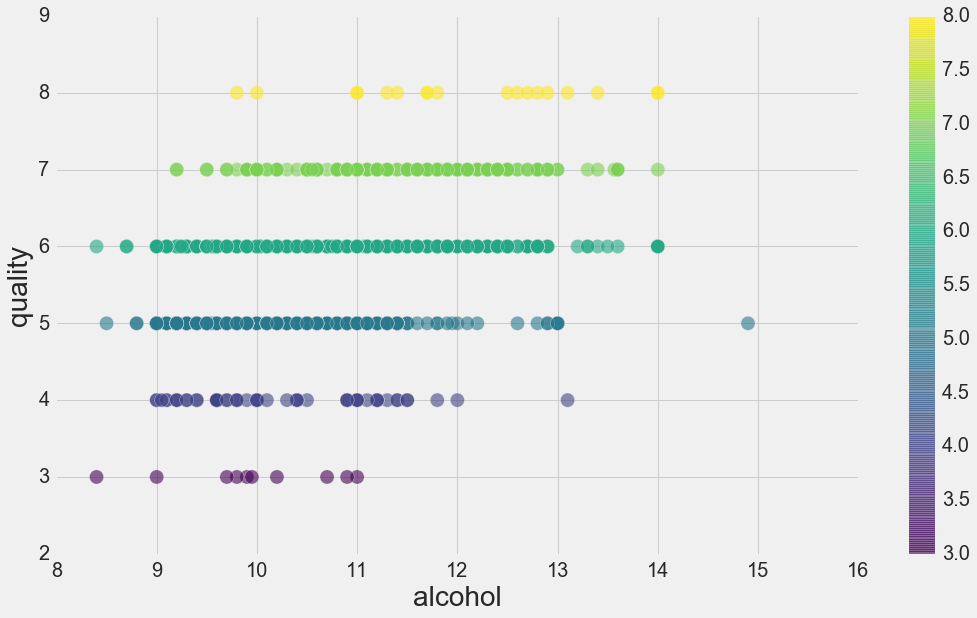

In [22]:
df.plot(kind = "scatter", y = "quality" , x = "alcohol", c = df.quality, \
        s = 200, alpha = 0.6, cmap=plt.cm.viridis)

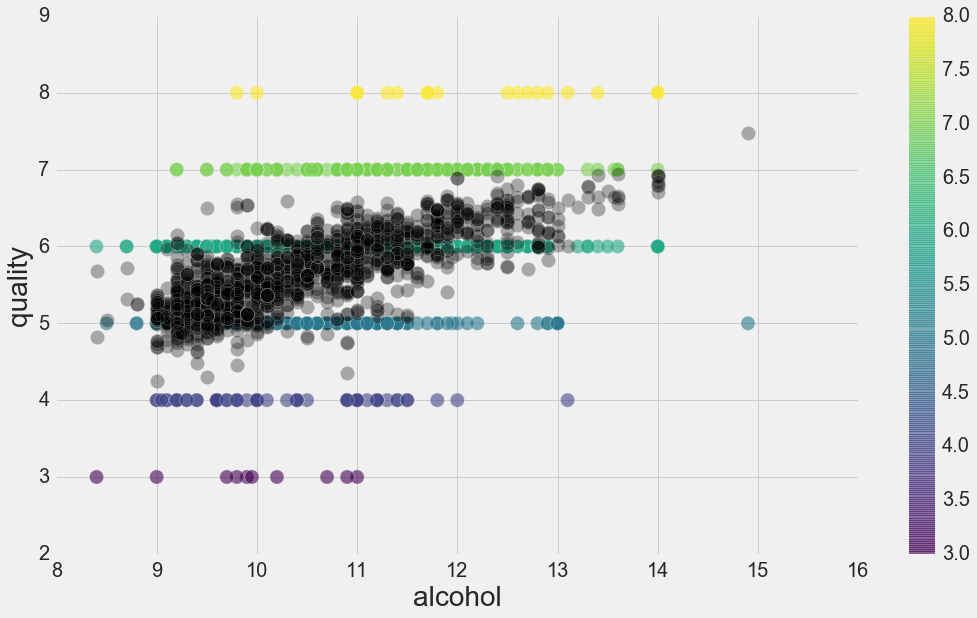

In [28]:
df.plot(kind = "scatter", y = "quality" , x = "alcohol", c = df.quality, \
        s = 200, alpha = 0.6, cmap=plt.cm.viridis)
plt.scatter(alcohol, prediction, c='black', s = 200, alpha=0.3)

In [32]:
prediction.shape

(1599,)

In [35]:
prediction = prediction.reshape(prediction.shape[0],1)

In [36]:
residual = prediction - quality

In [37]:
residual.shape

(1599, 1)

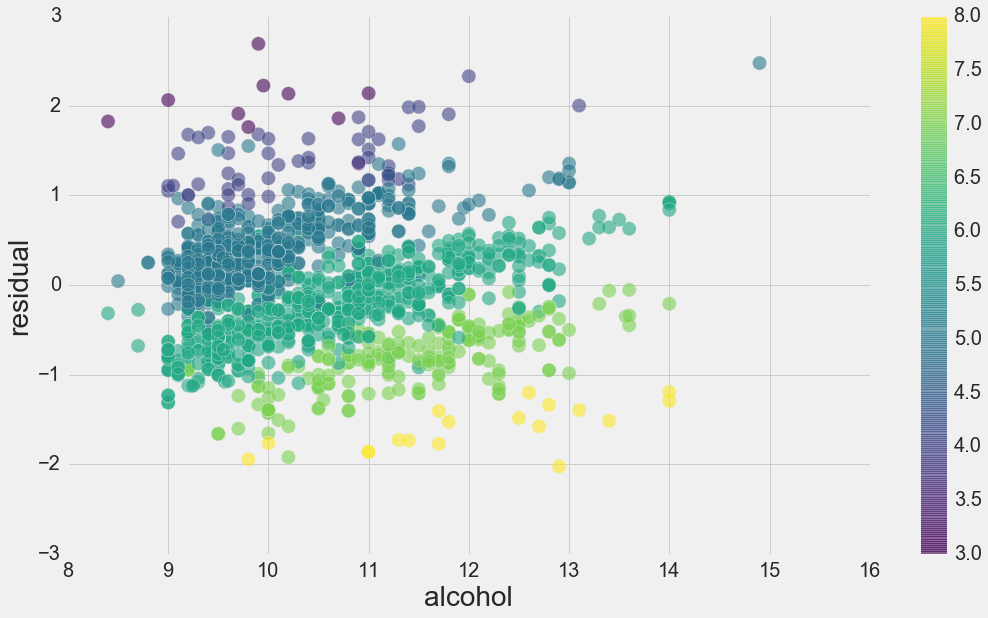

In [53]:
df.plot(kind = "scatter", y = "residual" , x = "alcohol", c = df.quality, \
        s = 200, alpha = 0.6, cmap=plt.cm.viridis)

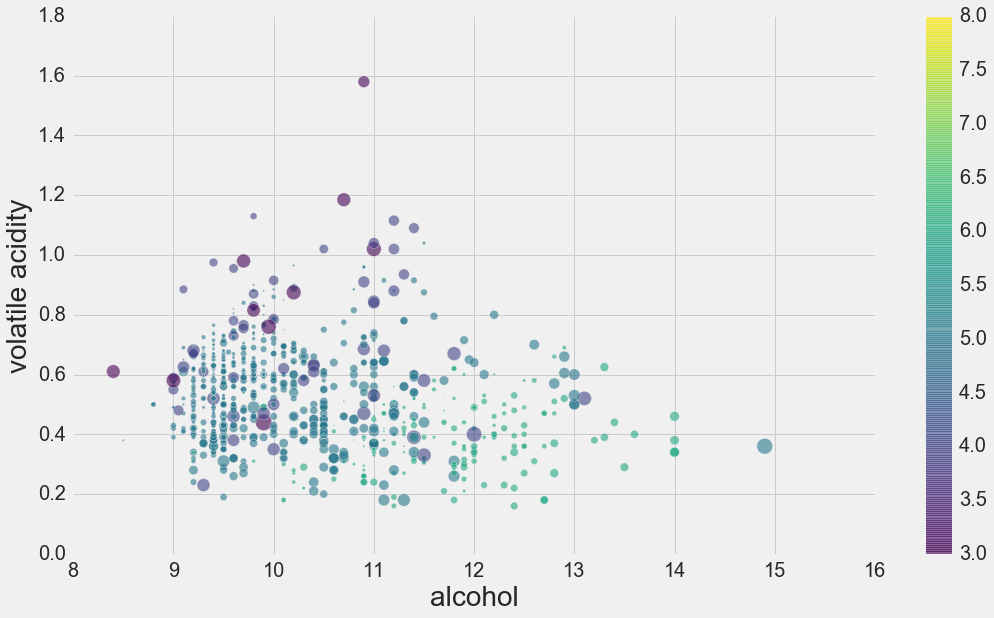

In [59]:
df.plot(kind = "scatter", y = "volatile acidity" , x = "alcohol", c = df.quality, \
        s = df.residual *100, alpha = 0.6, cmap=plt.cm.viridis)

In [60]:
df['valcohol'] = df['alcohol'] * df['volatile acidity']

In [61]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction,residual,valcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.032850,0.032850,6.580
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,5.137880,0.137880,8.624
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,5.209895,0.209895,7.448
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5.693858,-0.306142,2.744
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.032850,0.032850,6.580


In [65]:
# Regression Model on all the data + volatile acidity
modelX = linear_model.LinearRegression()
modelX.fit(df.iloc[:,(0,1,2,3,4,5,6,7,8,9,10,14)], df.iloc[:,11])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
modelX.score(df.iloc[:,(0,1,2,3,4,5,6,7,8,9,10,14)],df.iloc[:,11])

0.36130607986651897

In [73]:
predictionX = modelX.predict(df.iloc[:,(0,1,2,3,4,5,6,7,8,9,10,14)])

In [67]:
df['predictionX'] = modelX.predict(df.iloc[:,(0,1,2,3,4,5,6,7,8,9,10,14)])

In [69]:
df['residualX'] =  df['predictionX'] - df['quality']

In [70]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,prediction,residual,valcohol,predictionX,residualX
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.032850,0.032850,6.580,5.063868,0.063868
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,5.137880,0.137880,8.624,5.163333,0.163333
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,5.209895,0.209895,7.448,5.226348,0.226348
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5.693858,-0.306142,2.744,5.667054,-0.332946
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,5.032850,0.032850,6.580,5.063868,0.063868


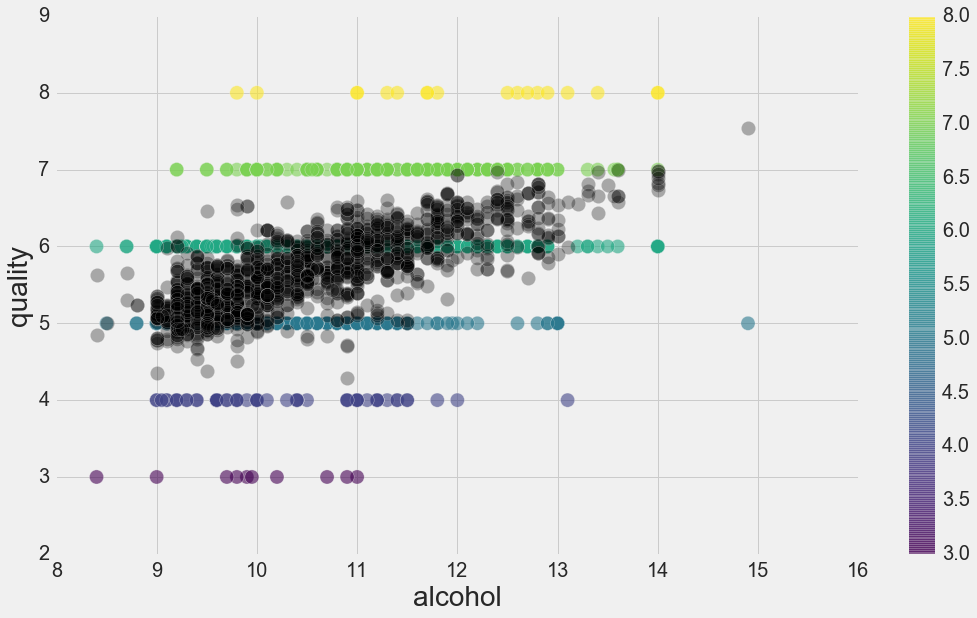

In [74]:
df.plot(kind = "scatter", y = "quality" , x = "alcohol", c = df.quality, \
        s = 200, alpha = 0.6, cmap=plt.cm.viridis)
plt.scatter(alcohol, predictionX, c='black', s = 200, alpha=0.3)

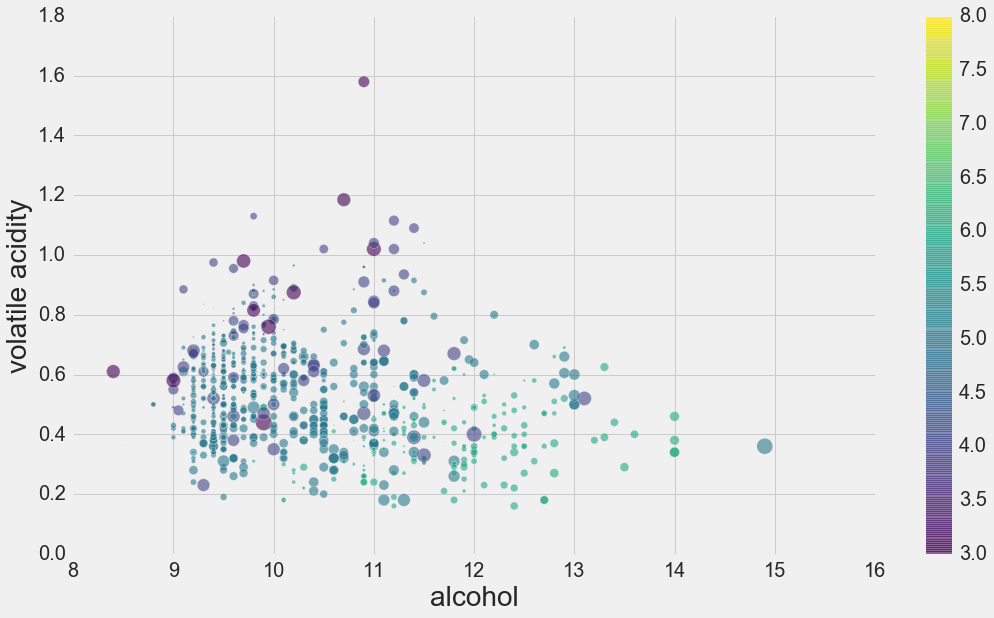

In [75]:
df.plot(kind = "scatter", y = "volatile acidity" , x = "alcohol", c = df.quality, \
        s = df.residualX *100, alpha = 0.6, cmap=plt.cm.viridis)